In [1]:
import pandas as pd
import numpy as np

from DataProcessorForTennisStrenghtModel import DataProcessorForTennisStrenghtModel

In [2]:
years = ["2020", "2021", "2022", "2023", "2024"]
data = [pd.read_csv(f'data/atp_matches_{yyyy}.csv') for yyyy in years]

### Strength model 

In [6]:
features_match_infos = ['tourney_name', 'tourney_date', 'round', 'surface', 'tourney_level']
player_names_columns = ['player1_name', 'player2_name']
features_general = ['surface_Hard', 'surface_Clay', 'surface_Grass', 'tourney_level_G', 'tourney_level_M', 'tourney_level_A', 'tourney_level_F', 'best_of_3', 'best_of_5']
        
features_player_1 = [
    'p1_ace', 'p1_df', 'p1_svpt', 'p1_1stIn', 'p1_1stWon', 'p1_2ndWon',
    'p1_bpSaved', 'p1_bpFaced', 'p1_1stServePct', 'p1_1stServeWinPct', 'p1_2ndServeWinPct',
]

features_player_2 = [
    'p2_ace', 'p2_df', 'p2_svpt', 'p2_1stIn', 'p2_1stWon', 'p2_2ndWon',
    'p2_bpSaved', 'p2_bpFaced', 'p2_1stServePct', 'p2_1stServeWinPct', 'p2_2ndServeWinPct',
]
columns = features_match_infos + player_names_columns + features_general + features_player_1 + features_player_2 

X_train = pd.DataFrame([], columns=columns)
Y_train = pd.DataFrame([], columns=['target'])

for i in range(len(data)-1):

    dataProcessor = DataProcessorForTennisStrenghtModel(data[i])
    dataProcessor.feature_engineering()

    X_train = pd.concat([X_train, dataProcessor.X], axis=0, ignore_index=True)
    Y_train = pd.concat([Y_train, dataProcessor.Y], axis=0, ignore_index=True)


dataProcessor = DataProcessorForTennisStrenghtModel(data[-1])
dataProcessor.feature_engineering()

X_test = dataProcessor.X
Y_test = dataProcessor.Y


preparing inputs and target...


100%|██████████| 1353/1353 [00:10<00:00, 131.60it/s]


Done !
preparing inputs and target...


100%|██████████| 2597/2597 [00:16<00:00, 154.82it/s]


Done !
preparing inputs and target...


100%|██████████| 2701/2701 [00:17<00:00, 156.88it/s]


Done !
preparing inputs and target...


100%|██████████| 2718/2718 [00:17<00:00, 156.16it/s]


Done !
preparing inputs and target...


100%|██████████| 2703/2703 [00:17<00:00, 158.85it/s]

Done !


In [ ]:
X_train

,tourney_name,tourney_date,round,surface,tourney_level,player1_name,player2_name,surface_Hard,surface_Clay,surface_Grass,...,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_bpSaved,p2_bpFaced,p2_1stServePct,p2_1stServeWinPct,p2_2ndServeWinPct
0,Doha,2020-01-06,R32,Hard,A,Gregoire Barrere,Jeremy Chardy,1,0,0,...,3.0,85.0,54.0,40.0,21.0,6.0,7.0,0.635294,0.740741,0.677419
1,Doha,2020-01-06,R32,Hard,A,Mikael Ymer,Aljaz Bedene,1,0,0,...,0.0,78.0,45.0,30.0,21.0,1.0,3.0,0.576923,0.666667,0.636364
2,Doha,2020-01-06,R32,Hard,A,Alexander Bublik,Adrian Mannarino,1,0,0,...,2.0,48.0,28.0,17.0,12.0,2.0,5.0,0.583333,0.607143,0.6
3,Doha,2020-01-06,R32,Hard,A,Tennys Sandgren,Corentin Moutet,1,0,0,...,2.0,69.0,57.0,48.0,6.0,7.0,7.0,0.826087,0.842105,0.5
4,Doha,2020-01-06,R32,Hard,A,Fernando Verdasco,Pablo Andujar,1,0,0,...,1.0,67.0,46.0,31.0,9.0,3.0,5.0,0.686567,0.673913,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9237,NextGen Finals,2023-11-27,RR,Hard,F,Abedallah Shelbayh,Alex Michelsen,1,0,0,...,1.0,55.0,37.0,22.0,8.0,5.0,10.0,0.672727,0.594595,0.444444
9238,NextGen Finals,2023-11-27,RR,Hard,F,Hamad Medjedovic,Abedallah Shelbayh,1,0,0,...,2.0,76.0,50.0,36.0,14.0,0.0,2.0,0.657895,0.72,0.538462
9239,NextGen Finals,2023-11-27,SF,Hard,F,Luca Van Assche,Arthur Fils,1,0,0,...,4.0,70.0,45.0,39.0,14.0,2.0,3.0,0.642857,0.866667,0.56
9240,NextGen Finals,2023-11-27,SF,Hard,F,Hamad Medjedovic,Dominic Stricker,1,0,0,...,0.0,33.0,18.0,15.0,8.0,0.0,1.0,0.545455,0.833333,0.533333


In [8]:
Y_train.drop(['target'], axis=1, inplace=True)
Y_train.rename(columns={0: 'target'}, inplace=True)
Y_train

,target
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
9237,1.0
9238,1.0
9239,0.0
9240,1.0


In [ ]:
from TennisPostGameScoreModel import TennisPostGameScoreModel

In [10]:
postGameModel = TennisPostGameScoreModel()
postGameModel.train_logistic_model(X_train.iloc[:, 7:], Y_train.values.reshape(-1,))

In [11]:
eval_outputs = postGameModel.evaluate_model(X_test.iloc[:, 7:], Y_test.values.reshape(-1,))

Accuracy: 0.9456


In [12]:
matches = dataProcessor.prepare_matches(postGameModel)

In [13]:
matches

[{'tournament': 'Brisbane',
  'round': 'R32',
  'player1': 'Max Purcell',
  'player2': 'Holger Rune',
  'actual_score': 0.0293,
  'target': 0,
  'date': numpy.datetime64('2024-01-01T00:00:00.000000000')},
 {'tournament': 'Brisbane',
  'round': 'R32',
  'player1': 'Alexander Shevchenko',
  'player2': 'Luca Van Assche',
  'actual_score': 0.9998,
  'target': 1,
  'date': numpy.datetime64('2024-01-01T00:00:00.000000000')},
 {'tournament': 'Brisbane',
  'round': 'R32',
  'player1': 'J J Wolf',
  'player2': 'James Duckworth',
  'actual_score': 0.0019,
  'target': 0,
  'date': numpy.datetime64('2024-01-01T00:00:00.000000000')},
 {'tournament': 'Brisbane',
  'round': 'R32',
  'player1': 'Yannick Hanfmann',
  'player2': 'Sebastian Korda',
  'actual_score': 0.9846,
  'target': 1,
  'date': numpy.datetime64('2024-01-01T00:00:00.000000000')},
 {'tournament': 'Brisbane',
  'round': 'R32',
  'player1': 'Ben Shelton',
  'player2': 'Roman Safiullin',
  'actual_score': 0.0066,
  'target': 0,
  'date': 

In [14]:
tournament_points = dataProcessor.create_tournament_points()

all_players = np.unique(list(X_test.player1_name)+list(X_test.player2_name))
initial_ratings = {player: 0 for player in all_players}

In [15]:
import json
import pickle

with open('outputs/matches.pickle', 'wb') as f:
    pickle.dump(matches, f)

with open('outputs/tournament_points.json', 'w', encoding='utf-8') as f:
    json.dump(tournament_points, f, indent=4)

with open('outputs/initial_ratings_all_zeros.json', 'w', encoding='utf-8') as f:
    json.dump(initial_ratings, f, indent=4)


### Evaluate the model

In [16]:
from TennisStrenghtModel import TennisStrenghtModel, evaluate_accuracy_on_next_match_prediction
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt

In [17]:
matches = pickle.load(open('outputs/matches.pickle', 'rb'))
tournament_points = json.load(open('outputs/tournament_points.json', 'r'))
#initial_ratings = json.load(open('outputs/initial_ratings_all_zeros.json', 'r'))
initial_ratings = json.load(open('data/initial_atp_points_20240101.json', 'r'))

In [18]:
strenghtModel = TennisStrenghtModel(initial_ratings, tournament_points)
strenghtModel.update_ratings(matches) 

Updating ratings...


100%|██████████| 2683/2683 [00:00<00:00, 19569.22it/s]

Done!


In [19]:
ratings = np.array(list(strenghtModel.ratings.values()))
argsort = np.argsort(-ratings)
ratings_sorted = ratings[argsort]
all_players_ranked = np.array(list(strenghtModel.ratings.keys()))[argsort]

final_ratings = {player: rating for player, rating in zip(all_players_ranked, ratings_sorted)}

In [20]:
final_ratings

{'Novak Djokovic': 14064.036700000002,
 'Daniil Medvedev': 13592.556700000003,
 'Carlos Alcaraz': 11003.3186,
 'Jannik Sinner': 10485.36926666667,
 'Alexander Zverev': 9248.963641666667,
 'Taylor Fritz': 8090.909083333333,
 'Andrey Rublev': 7353.768666666665,
 'Casper Ruud': 6984.957708333333,
 'Holger Rune': 6834.144,
 'Stefanos Tsitsipas': 6782.518500000001,
 'Grigor Dimitrov': 5937.9614999999985,
 'Alex De Minaur': 5278.070233333334,
 'Hubert Hurkacz': 5224.749499999998,
 'Frances Tiafoe': 5129.739249999998,
 'Karen Khachanov': 4758.584783333334,
 'Tommy Paul': 4638.130833333333,
 'Ben Shelton': 4408.565541666668,
 'Ugo Humbert': 4099.872833333334,
 'Lorenzo Musetti': 4095.266283333332,
 'Francisco Cerundolo': 3497.7470833333323,
 'Felix Auger Aliassime': 3335.4830833333326,
 'Sebastian Korda': 3303.8969166666657,
 'Nicolas Jarry': 3229.9010000000007,
 'Tallon Griekspoor': 2984.3799166666677,
 'Cameron Norrie': 2970.379,
 'Alexander Bublik': 2918.7644999999993,
 'Jack Draper': 2918.

In [21]:
json.dump(final_ratings, open('outputs/final_ratings_strengthmodel.json', 'w', encoding='utf-8'), indent=4)

In [22]:
ignored_players = evaluate_accuracy_on_next_match_prediction(data[-1], strenghtModel.ratings_story)

0it [00:00, ?it/s]

2703it [00:00, 15321.71it/s]

Accuracy: 0.63 (1693/2697)
Ignored matches: 6


In [25]:
1693/2697, 1705/2696

(0.6277345198368558, 0.6324183976261127)

### Ratings analysis

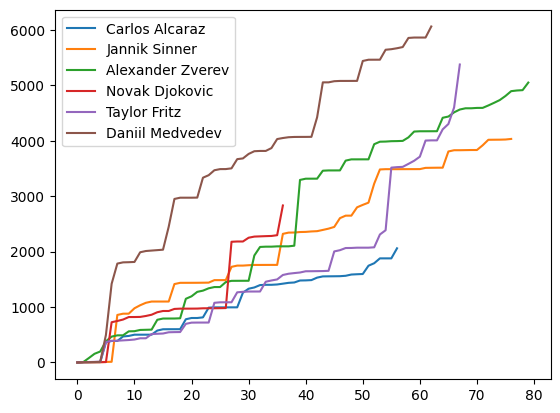

In [20]:
plt.plot(strenghtModel.ratings_story['Carlos Alcaraz']["ratings"], label='Carlos Alcaraz')
plt.plot(strenghtModel.ratings_story['Jannik Sinner']["ratings"], label='Jannik Sinner')
plt.plot(strenghtModel.ratings_story['Alexander Zverev']["ratings"], label='Alexander Zverev')
plt.plot(strenghtModel.ratings_story['Novak Djokovic']["ratings"], label='Novak Djokovic')
plt.plot(strenghtModel.ratings_story['Taylor Fritz']["ratings"], label='Taylor Fritz')
plt.plot(strenghtModel.ratings_story['Daniil Medvedev']["ratings"], label='Daniil Medvedev')
plt.legend()